In [ ]:
import pandas as pd
import librosa
import librosa.display
import matplotlib.pyplot as plt
import numpy as np

In [4]:
pip install librosa

Note: you may need to restart the kernel to use updated packages.


In [5]:
pip install --upgrade librosa

Note: you may need to restart the kernel to use updated packages.


### Testing one sample

In [6]:
import librosa

file_path = r'C:\Users\Lenovo PC\Desktop\EduCollab Project NLP\GV_Eval_3h\Audio\01-00004-02.mp3'

audio_signal, sample_rate = librosa.load(file_path, sr=None)

# sr(sampling rate)=None means that librosa will use the native sampling rate of the audio file.

# Print the shape and duration of the audio signal
print("Audio signal shape: ", audio_signal.shape)
print("Audio duration (seconds): ", len(audio_signal) / sample_rate)


Audio signal shape:  (96032,)
Audio duration (seconds):  12.004


### Read transcription

In [7]:
#file_path = r'GV_Eval_3h//text'
file_path = r'C:\Users\Lenovo PC\Desktop\EduCollab Project NLP\GV_Eval_3h\text'

In [8]:
with open(file_path, 'r',encoding='utf-8') as file:
    file_contents = file.read()
print(file_contents)


01-00004-02 वहीं राहुल कुमार मुकेश कुमार अरुण कुमार राजा कुमार अनुराग कुमार सनी कुमार रहीश कुमार मनीष कुमार सहित दर्जनों कार्यकर्ता भी शामिल थे धन्यवाद दिलीप पांडे जमुई अघहारा से बिहार मोबइल वाणी न्यूज़ एक्सप्रेस से
01-00008-03 युवा की अहम् जिम्मेदारी है इसलिए बहुत समय या पैसे खर्च करने की ज़रुरत नहीं है  दिन
01-00031-03 क्यूँकि हमारी पुलिस तो फेसबुक और दुसरे सोशल मीडिया के माध्यमों पर अपराध करने वालों को पकड़ने में ही असमर्थ है
01-00071-02 नाली जाम है जिससे निकालता गन्दा पानी सड़को पर जमा है जिसकी सफाई को लेकर किसी प्रकार की कयावत होती भी नहीं दिखती है
01-00078-01 समस्या को सुना जायेगा और महिलाओं की समस्या महिलाओं समझ सकती है इस इस विचार को रखते हुए सरकार ने महिलाओं के प्र 
01-00093-01 विकास के लिए शराब बंदी एक बड़ा कदम है इस मुद्दे पर जदूय जि ज़िला अध्यक्ष शंकर चौधरी जदूय नेता
01-00097-03 इस मध्य प्रदेश मोबाइल वाणी के सभी सुनने वाले श्रोताओं को और मेरे मित्रों को सभी को हार्दिक हार्दिक शुभकामनाएं धन्यवाद नमस्कार
01-00119-02 स्तर गिरने का मुख्य कारण  संस्कृति और परम्पराओं का सबक सबक बच्चों 

### Map transcription and audio path

In [9]:
#file_path = r'GV_Eval_3h//mp3.scp'
file_path=r'C:\Users\Lenovo PC\Desktop\EduCollab Project NLP\GV_Eval_3h\mp3.scp'

In [10]:
import pandas as pd

# Read the text file into a list of strings
with open(file_path, 'r',encoding='utf-8') as file:
    lines = file.readlines()

# Extract the ID and text for each line
data = {'ID': [], 'File Path': []}
for line in lines:
    parts = line.split(maxsplit=1) #splitting the line at the first occurence of a space
    data['ID'].append(parts[0])
    data['File Path'].append(parts[1].strip())

# Create a pandas DataFrame from the data dictionary
df1 = pd.DataFrame(data)

df1

,ID,File Path
0,02-17489-01,./Audio/02-17489-01.mp3
1,02-13513-01,./Audio/02-13513-01.mp3
2,01-01255-01,./Audio/01-01255-01.mp3
3,01-06364-01,./Audio/01-06364-01.mp3
4,01-01003-01,./Audio/01-01003-01.mp3
...,...,...
1027,01-02492-02,./Audio/01-02492-02.mp3
1028,01-04510-03,./Audio/01-04510-03.mp3
1029,02-16286-01,./Audio/02-16286-01.mp3
1030,01-08248-03,./Audio/01-08248-03.mp3


In [11]:
#file_path = r'GV_Eval_3h//text'
file_path = r'C:\Users\Lenovo PC\Desktop\EduCollab Project NLP\GV_Eval_3h\text'

In [12]:
#since the id and path are in a text file, thus spliting and making them form a seperate column to form a dataframe,
#for adding them in the csv. Hence a keyword ID with which all the ID will be linked, thus forming a dictionary
with open(file_path, 'r',encoding='utf-8') as file:
    lines = file.readlines()

data = {'ID': [], 'Text': []}
for line in lines:
    parts = line.split(maxsplit=1)
    data['ID'].append(parts[0])
    data['Text'].append(parts[1].strip())

df = pd.DataFrame(data)

print(df)


               ID                                               Text
0     01-00004-02  वहीं राहुल कुमार मुकेश कुमार अरुण कुमार राजा क...
1     01-00008-03  युवा की अहम् जिम्मेदारी है इसलिए बहुत समय या प...
2     01-00031-03  क्यूँकि हमारी पुलिस तो फेसबुक और दुसरे सोशल मी...
3     01-00071-02  नाली जाम है जिससे निकालता गन्दा पानी सड़को पर ज...
4     01-00078-01  समस्या को सुना जायेगा और महिलाओं की समस्या महि...
...           ...                                                ...
1027  13-00608-02  नमस्कार श्रोता मैं मोबाइल मिडिया रिपोर्टर खुर्...
1028  13-00631-03  की सरकारी कार्यालयों में बढ़ती भ्रष्टाचार का मू...
1029  13-00649-03  नमस्कार श्रोताओ में मैं धनबाद मोबाइल मीडिया से...
1030  13-00655-01  इसी के साथ बताना चाहता हूँ कि कोई ध्यान नहीं र...
1031  13-00670-02  इसके साथ एक सौ एक घोड़े के साथ बारात निकाली जाए...

[1032 rows x 2 columns]


In [13]:
df2=df.merge(df1,on='ID')

In [14]:
df2

,ID,Text,File Path
0,01-00004-02,वहीं राहुल कुमार मुकेश कुमार अरुण कुमार राजा क...,./Audio/01-00004-02.mp3
1,01-00008-03,युवा की अहम् जिम्मेदारी है इसलिए बहुत समय या प...,./Audio/01-00008-03.mp3
2,01-00031-03,क्यूँकि हमारी पुलिस तो फेसबुक और दुसरे सोशल मी...,./Audio/01-00031-03.mp3
3,01-00071-02,नाली जाम है जिससे निकालता गन्दा पानी सड़को पर ज...,./Audio/01-00071-02.mp3
4,01-00078-01,समस्या को सुना जायेगा और महिलाओं की समस्या महि...,./Audio/01-00078-01.mp3
...,...,...,...
1027,13-00608-02,नमस्कार श्रोता मैं मोबाइल मिडिया रिपोर्टर खुर्...,./Audio/13-00608-02.mp3
1028,13-00631-03,की सरकारी कार्यालयों में बढ़ती भ्रष्टाचार का मू...,./Audio/13-00631-03.mp3
1029,13-00649-03,नमस्कार श्रोताओ में मैं धनबाद मोबाइल मीडिया से...,./Audio/13-00649-03.mp3
1030,13-00655-01,इसी के साथ बताना चाहता हूँ कि कोई ध्यान नहीं र...,./Audio/13-00655-01.mp3


In [15]:
#df2.to_csv('ASR_data.csv')
df2.to_csv('New_ASR_data.csv')

In [16]:
df2['Full File Path '] = df2['ID'].apply(lambda x: r"C:\\Users\\Lenovo PC\\Desktop\\EduCollab Project NLP\\GV_Eval_3h\\Audio\\" + x +".mp3")


In [17]:
test=df2['Full File Path '].iloc[0]

In [18]:
#path testing
import librosa

#file_path = r'C:\Users\Lenovo PC\Desktop\EduCollab Project NLP\GV_Eval_3h\Audio\01-00004-02.mp3'

audio_signal, sample_rate = librosa.load(test, sr=None)

# sr(sampling rate)=None means that librosa will use the native sampling rate of the audio file.

# Print the shape and duration of the audio signal
print("Audio signal shape: ", audio_signal.shape)
print("Audio duration (seconds): ", len(audio_signal) / sample_rate)

Audio signal shape:  (96032,)
Audio duration (seconds):  12.004


In [19]:
df2.to_csv('New_ASR_data.csv')

In the above code, a .csv file has been created which contains text data and the corresponding link to the audio file

Now, accessing the audio file from the csv file

In [20]:
import pandas as pd

In [21]:
df = pd.read_csv(r'C:\Users\Lenovo PC\Desktop\EduCollab Project NLP\New_ASR_data.csv')
df.shape

(1032, 5)

In [22]:
df.columns

Index(['Unnamed: 0', 'ID', 'Text', 'File Path', 'Full File Path '], dtype='object')

In [23]:
def generateSamplingRate(filePath):
    audio_signal, sample_rate = librosa.load(filePath, sr=None)
    print("Audio signal shape: ", audio_signal.shape)
    print("Audio duration (seconds): ", len(audio_signal) / sample_rate)

In [24]:
def generateMelspectrogram(filePath):
    import matplotlib.pyplot as plt

    # Load the audio file
    y, sr = librosa.load(filePath)

# Convert audio to mel spectrogram
    n_fft = 2048
    hop_length = 512
    n_mels = 128
    mel_spec = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=n_fft, hop_length=hop_length, n_mels=n_mels)

# Convert mel spectrogram to decibel scale
    mel_spec_db = librosa.power_to_db(mel_spec, ref=np.max)

# Display mel spectrogram
    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mel_spec_db, y_axis='mel', x_axis='time')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Mel spectrogram')
    plt.show()

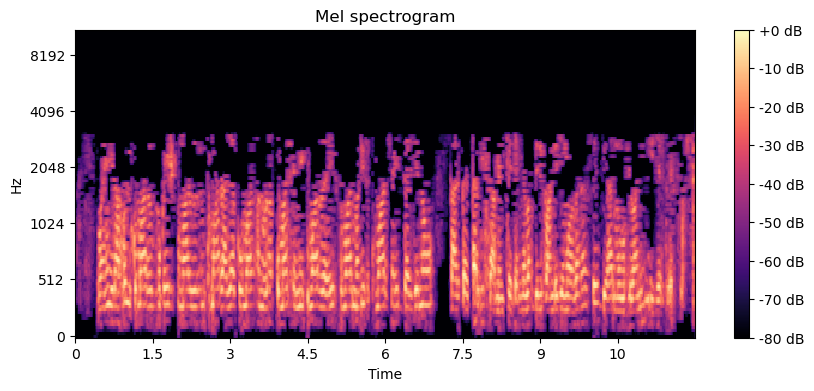

AttributeError: module 'matplotlib' has no attribute 'pyplot'

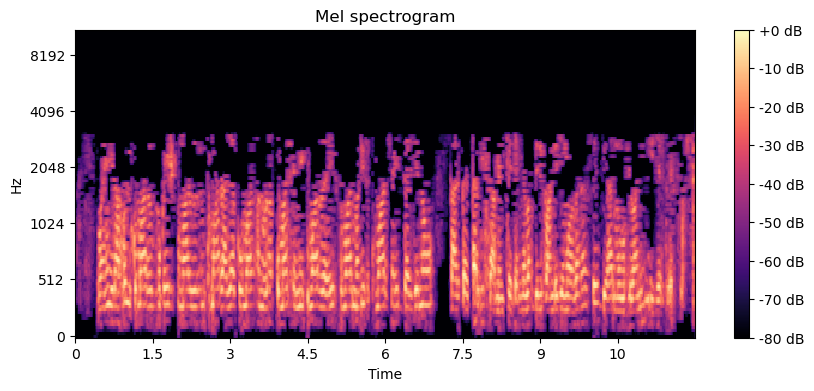

AttributeError: module 'matplotlib' has no attribute 'pyplot'

In [25]:
#generating sampling rate of every audio file, attempting to implement Batch Generators.

for i in range(1032):
    filePath = df['Full File Path '][i]
    #generateSamplingRate(filePath)
    generateMelspectrogram(filePath)
    

In [ ]:
#generating Melspectrogram, following errors in every 3rd file. Will try to implement Batch Generator.
##A batch generates batches of data on the fly, instead of loading the entire dataset on the fly.
# 3 is the batch size
def batch_generator(df):
    batchSize = 3
    filePath_batch = []
    n = len(df['Full File Path '])
    for i in range(0,n,batchSize):
        filePath_batch[0] = df['Full File Path '][i]
        filePath_batch[1] = df['Full File Path '][i+1]
        filePath_batch[2] = df['Full File Path '][i+2]
    return filePath_batch
        


In [ ]:
filePath_batch = batch_generator(df)
for i in filePath_batch:
    print(i)